#HW 3 - Fourier Transform (FT) and Principal Component Analysis (PCA) (10 pts)
---
For homework assignment HW 3, you will explore two fundamental pillars of image processing and pattern recognition: Fourier Transform (FT) and Principal Component Analysis (PCA). You will use FT to remove moire effects and create hybrid images, and use PCA to implement a handwritten digit recognition system.

Note: starting with this assignment, you can use any advanced functions. However, if you are selected for a random check, you must be able to explain your code.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Load image and display it. Feel free to load any image you want, but remember to submit your image if you don't use the image that comes with the assignment.

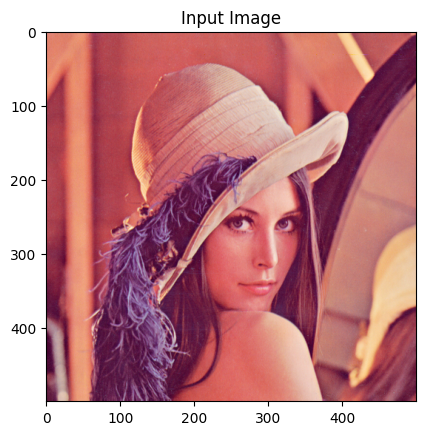

In [17]:
filename = 'Lenna.png'
img_raw = cv2.imread(filename)
H, W, C = img_raw.shape
img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.title("Input Image")
plt.imshow(img)
plt.show()



###Task 1 (2 pts)

1. Domain transformation: convert the above image (or any image of your choice) from spatial domain to frequency domain by using Fourier Transform. And display the **shifted** frequency FT image.
2. Circular Masking: Apply circle masks to preserve the center region and remove the rest area of the FT image. Use circles with radius of pixel size [1, 4, 8, 16, 32, 64, 128].
3. Image Reconstruction: reconstruct the images by performing Inverse Fourier Transform for all the masked FT image to return to spatial domain.

In [ ]:
# insert your code here

###Task 2 (2 pts)

The image Lenna_moire.png is contaminated with a periodic Moiré pattern. This effect usually appears in the frequency domain as concentrated "bursts" or "spikes" of high energy at specific coordinates that is far from the center of a shifted FT image. Please remove the moire effect by using Fourier Transform.

Note: use any masking methods you find appropriate (such as circular filtering, ring-shaped filtering, slicing out regions, etc.). The result might still have some artifacts (like faint ghosts of the pattern) even after filtering. Please experiment with different masking approaches and try your best to get a reasonable result.

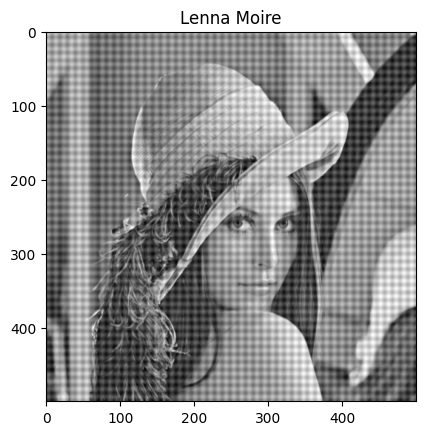

In [10]:
img_moire = cv2.imread("Lenna_moire.png")
img = cv2.cvtColor(img_moire, cv2.COLOR_BGR2RGB)
plt.title("Lenna Moire")
plt.imshow(img)
plt.show()

In [ ]:
# insert your code here

###Task 3 (2 pts)

1. Create a hybrid image by performing frequency-domain blending of Lenna.png and cat.jpg. Use a mask to reserve only the central region (low frequencies) of the first image, and use an inverse mask to preserve the outer regions (high frequencies) of the second image. You can use the images of your choice, and it doesn't matter which image is the 1st (low frequency) or 2nd (high frequency).

2. The transition between the two images is controlled by the radius of your mask. Play with the mask size and find an optimal crossover point that can make the high frequency more visible when observed at closer range but less visible than the low frequency when observed from a distance.

2. (optional) A Gaussian blur on the mask edges can help reduce "ringing" artifacts in the final hybrid (1 Bonus pt).


In [ ]:
# insert your code here

###Task 4-1 (4 pts) PCA

Implement Principal Component Analysis (PCA) using Singular Value Decomposition (SVD) to compress, visualize, and classify handwritten digits from the MNIST dataset. In the meantime, you need to:

1. Mean Image: Calculate and display the mean image;
2. Principal Components: Extract and visualize the 1st through 4th principal components (eigen-digits) to identify the primary directions of variance;
3. The starter code provides a test image randomly selected from the dataset (indices from sample_n to the end). Project this test image into the eigen-space. Find the closest point (best match/nearest neighbor) within the eigen-space to identify the digit. Reconstruct and display the image that is the closest point in the eigenspace.


In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load MINIST handwritten digit dataset
# each image is 28x28 size (784), and numpy format
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# load the first 5000 images as sample.
# Feel free to change sample size for better performance
sample_n = 5000
f_raw = torch.tensor(mnist.data.astype(np.float32))[:sample_n]
# ground truth labels of the samples
label = mnist.target.astype(int)[:sample_n]

print(f_raw.shape)

torch.Size([5000, 784])


In [13]:
# Centering and Normalization

# PCA via SVD
U, S, Vh = torch.linalg.svd(f)

# insert your code here

# Find k such that cumulative ratio > 0.95
# insert your code here

# Project all the samples into the eigen space
# insert your code here

# get a test image with random index from sample_n to the end of the dataset
test_image_idx = np.random.randint(sample_n, len(mnist.data))
test_image_raw = torch.tensor(mnist.data.astype(np.float32))[test_image_idx].unsqueeze(0)
test_image_label = mnist.target.astype(int)[test_image_idx]

# Project the test image into the eigen space
# Make sure you center and normalize it


# Find the nearest neighbor (best match/closet point)


# Reconstruct the nearest neighbor (best match/closet point)


# insert your code here


### Task 4-2 (Optional) Handwritten digit recognition playground, just for fun 😀 (0 pt)

When you run the above code, it will render a canvas for you to provide your hand drawing. Please play with it and hook it up with the digit recognition pipeline that you create in the above. So you will have a complete handwritten digit recognition system.

---



In [ ]:
import numpy as np
from IPython.display import HTML, display
from google.colab import output
import cv2

# This HTML/JS string creates the drawing interface
canvas_html = """
<canvas id="main_canvas" width="280" height="280" style="border:2px solid #000000; cursor: crosshair; background-color: black;"></canvas>
<br>
<button id="finish_btn">Finish & Convert</button>

<script>
    var canvas = document.getElementById('main_canvas');
    var ctx = canvas.getContext('2d');
    var button = document.getElementById('finish_btn');
    var drawing = false;

    // Set drawing style (White ink on black background - MNIST style)
    ctx.strokeStyle = "white";
    ctx.lineWidth = 15;
    ctx.lineCap = "round";

    canvas.addEventListener('mousedown', (e) => { drawing = true; ctx.beginPath(); ctx.moveTo(e.offsetX, e.offsetY); });
    canvas.addEventListener('mousemove', (e) => { if(drawing) { ctx.lineTo(e.offsetX, e.offsetY); ctx.stroke(); } });
    canvas.addEventListener('mouseup', () => { drawing = false; });

    var data = new Promise(resolve => {
        button.onclick = () => {
            resolve(canvas.toDataURL('image/png'));
        }
    });
</script>
"""

def get_drawing():
    display(HTML(canvas_html))
    # Wait for the user to click the button and get the image data
    data_url = output.eval_js("data")

    # Process the Base64 image string
    import base64
    binary = base64.b64decode(data_url.split(',')[1])

    # Convert binary to numpy array
    nparr = np.frombuffer(binary, np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)

    # Resize from 280x280 back down to 28x28
    img_28x28 = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

    return img_28x28

# Execute the function
user_digit = get_drawing()

# Show the resulting numpy array
import matplotlib.pyplot as plt
plt.imshow(user_digit, cmap='gray')
plt.title(f"Shape: {user_digit.shape}")
plt.show()

In [ ]:
# use your handwritten digit as test image for digit recognition
# your drawing is stored in img_28x28
# you might have to convert it into the format aligned with your test image